In [1]:
import pandas as pd
import numpy as np
# pd.set_option("display.precision", 2)

## Creating, reading and saving

Основные структуры данных:
- Series - одномерная структура
- DataFrame - двумерная структура

Каждый столбец DataFrame - это объект Series

#### Конструктор для создания таблиц

In [2]:
df = pd.DataFrame([['I liked it.', 'It was awful.'], 
                  ['Pretty good.', 'Bland.']],
                  columns = ['Bob', 'Sue'])
df

,Bob,Sue
0,I liked it.,It was awful.
1,Pretty good.,Bland.


In [3]:
# 1
df1 = pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 
              'Sue': ['Pretty good.', 'Bland.']},
             index=['Product A', 'Product B'])

display(df1)
# 2
df2 = pd.DataFrame([['I liked it.', 'It was awful.'], 
                  ['Pretty good.', 'Bland.']],
                  columns = ['Bob', 'Sue'],
             index=['Product A', 'Product B'])
display(df2)

,Bob,Sue
Product A,I liked it.,Pretty good.
Product B,It was awful.,Bland.


,Bob,Sue
Product A,I liked it.,It was awful.
Product B,Pretty good.,Bland.


In [4]:
print ("Размер DataFrame:", df.shape)
print ("Индекс DataFrame:", df.index)
print ("Столбцы DataFrame:", df.columns)
print ("Значения DataFrame:")
print (df.values)

Размер DataFrame: (2, 2)
Индекс DataFrame: RangeIndex(start=0, stop=2, step=1)
Столбцы DataFrame: Index(['Bob', 'Sue'], dtype='object')
Значения DataFrame:
[['I liked it.' 'It was awful.']
 ['Pretty good.' 'Bland.']]


In [5]:
df.index # генератор
df.index.values # массив

array([0, 1])

#### Чтение из файлов 

В pandas есть возможность считывать таблицы данных различных расширений:
- csv (pd.read_csv)
- excel (pd.read_excel)
- sas (pd.read_sas)
- ...

Считаем 2 таблицы:
- covid_data.csv - статистика по короновирусу по странам
- countries.csv - информация о странах

In [6]:
# считаем 2 csv 
data = pd.read_csv('covid_data.csv')
countries = pd.read_csv('countries.csv')

In [7]:
data.head(10)

,iso_code,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
5,AFG,2020-02-29,5.0,0.0,0.714,NaN,NaN,0.0,0.126,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
6,AFG,2020-03-01,5.0,0.0,0.714,NaN,NaN,0.0,0.126,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
7,AFG,2020-03-02,5.0,0.0,0.000,NaN,NaN,0.0,0.126,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
8,AFG,2020-03-03,5.0,0.0,0.000,NaN,NaN,0.0,0.126,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
9,AFG,2020-03-04,5.0,0.0,0.000,NaN,NaN,0.0,0.126,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [8]:
# сохраним таблицу в файл
data.to_csv('covid_data_1.csv', index=False)

# можно сохроанить в разные форматы
data.to_excel('covid_data_1.xlsx', index=False)

KeyboardInterrupt: 

## Indexing and selecting

Вернемся к DataFrame.


In [9]:
data.head(5)

,iso_code,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [10]:
data.tail(5)

,iso_code,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
125306,ZWE,2021-10-17,132368.0,35.0,81.714,4658.0,1.0,3.000,8770.640,2.319,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
125307,ZWE,2021-10-18,132368.0,0.0,70.429,4658.0,0.0,2.143,8770.640,0.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
125308,ZWE,2021-10-19,132405.0,37.0,55.571,4659.0,1.0,2.000,8773.092,2.452,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
125309,ZWE,2021-10-20,132437.0,32.0,47.000,4659.0,0.0,1.571,8775.212,2.120,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
125310,ZWE,2021-10-21,132540.0,103.0,41.286,4662.0,3.0,1.000,8782.037,6.825,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


#### .loc
Передавать можно:
- метку
- список меток
- slice (правый конец включен)
- булевский массив
- lambda-функции

In [ ]:
[start:end:step]

In [11]:
data.loc[800:805, ['date', 'iso_code']]

,date,iso_code
800,2020-08-25,OWID_AFR
801,2020-08-26,OWID_AFR
802,2020-08-27,OWID_AFR
803,2020-08-28,OWID_AFR
804,2020-08-29,OWID_AFR
805,2020-08-30,OWID_AFR


In [12]:
data.loc[data.total_cases > 1000000, ['date', 'iso_code', 'total_cases']]

,date,iso_code,total_cases
781,2020-08-06,OWID_AFR,1008204.0
782,2020-08-07,OWID_AFR,1021693.0
783,2020-08-08,OWID_AFR,1035915.0
784,2020-08-09,OWID_AFR,1048272.0
785,2020-08-10,OWID_AFR,1057404.0
...,...,...,...
123582,2021-10-17,OWID_WRL,240706344.0
123583,2021-10-18,OWID_WRL,241132266.0
123584,2021-10-19,OWID_WRL,241573517.0
123585,2021-10-20,OWID_WRL,242041201.0


In [13]:
# Для обращения к элементам масивов данных pandas в условиях  нельзя испоьзовать логические операторы or и and 
# Но можно пользоваться | и & соответственно
data.loc[(data.total_cases > 1000000) & (data.total_vaccinations < 10000), ['total_cases']]

,total_cases
937,3024442.0
941,3144210.0
943,3210014.0
944,3237542.0
4818,1602163.0
...,...
123271,70594659.0
123272,71300704.0
123273,71937739.0
123274,72467046.0


#### .iloc
Передавать можно:

- целое число
- целочисленный список меток
- slice (правый конец не включен)
- lambda-функции

In [14]:
data.columns

Index(['iso_code', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'reproduction_rate', 'icu_patients', 'icu_patients_per_million',
       'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 

In [15]:
data.iloc[1, [1, 2]]

date           2020-02-25
total_cases           5.0
Name: 1, dtype: object

In [16]:
data.iloc[[1, 2], [1, 2]]

,date,total_cases
1,2020-02-25,5.0
2,2020-02-26,5.0


In [17]:
data.iloc[:5, [1, 2]]

,date,total_cases
0,2020-02-24,5.0
1,2020-02-25,5.0
2,2020-02-26,5.0
3,2020-02-27,5.0
4,2020-02-28,5.0


In [18]:
data.iloc[(data.total_cases > 1000000) & (data.total_vaccinations < 10000), 1]

NotImplementedError: iLocation based boolean indexing on an integer type is not available

#### .at

Свойство получает значение в столбце для указанной строки

In [19]:
data.at[500, 'date']

'2021-07-08'

## Functions and operations

######  Смотрим статистику по столбцам

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125311 entries, 0 to 125310
Data columns (total 63 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   iso_code                                 125311 non-null  object 
 1   date                                     125311 non-null  object 
 2   total_cases                              118548 non-null  float64
 3   new_cases                                118544 non-null  float64
 4   new_cases_smoothed                       117530 non-null  float64
 5   total_deaths                             107633 non-null  float64
 6   new_deaths                               107786 non-null  float64
 7   new_deaths_smoothed                      117530 non-null  float64
 8   total_cases_per_million                  117925 non-null  float64
 9   new_cases_per_million                    117921 non-null  float64
 10  new_cases_smoothed_per_million  

In [21]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.185480e+05,118544.000000,117530.000000,1.076330e+05,107786.000000,117530.000000,117925.000000,117921.000000,116912.000000,107023.000000,...,86270.000000,85020.000000,55718.000000,100645.000000,118859.000000,110809.000000,4563.000000,4563.000000,4563.000000,4563.000000
mean,1.501679e+06,6455.285894,6475.664003,3.768573e+04,144.047502,131.513056,18652.984113,84.721668,84.696605,386.524361,...,10.591798,32.743238,50.886463,3.030776,73.258756,0.726353,29867.812601,8.250493,15.553517,733.690022
std,1.001869e+07,39202.648651,38800.727107,2.243444e+05,785.584634,735.847049,31366.086438,196.316017,165.374760,646.028012,...,10.503878,13.508404,31.824830,2.456880,7.534963,0.150067,84621.602001,15.739907,31.104837,1120.115624
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.001000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-31959.400000,-27.350000,-95.920000,-1749.128494
25%,2.101000e+03,3.000000,9.571000,7.100000e+01,0.000000,0.000000,373.463000,0.292000,1.585000,10.846000,...,1.900000,21.600000,20.859000,1.300000,67.920000,0.602000,-230.100000,-1.245000,-1.100000,-51.045544
50%,2.237950e+04,94.000000,117.286000,6.270000e+02,2.000000,1.714000,2916.981000,10.901000,15.133500,72.780000,...,6.300000,31.400000,49.839000,2.400000,74.620000,0.744000,1811.700000,4.790000,6.160000,314.754547
75%,2.257605e+05,937.000000,989.714000,5.487000e+03,19.000000,16.000000,23094.092000,82.728000,92.322250,479.600500,...,19.300000,41.300000,83.241000,4.000000,78.740000,0.848000,18465.750000,13.295000,21.745000,1264.341911
max,2.424983e+08,905955.000000,826438.429000,4.929776e+06,18006.000000,14703.143000,223142.251000,8620.690000,3385.473000,5993.660000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,746026.500000,106.830000,373.280000,6124.441930


In [22]:
countries['continent'].value_counts()

Africa           55
Europe           51
Asia             50
North America    34
Oceania          21
South America    13
Name: continent, dtype: int64

In [23]:
data['new_cases'].mean()

6455.285893845324

In [25]:
data['new_cases'].sum()

765235411.0

In [26]:
data['new_cases'].std()

39202.64865080523

In [27]:
data['new_cases'] / data['total_cases']

0         1.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
125306    0.000264
125307    0.000000
125308    0.000279
125309    0.000242
125310    0.000777
Length: 125311, dtype: float64

In [28]:
data['new_cases'] * data['total_cases']

0               25.0
1                0.0
2                0.0
3                0.0
4                0.0
             ...    
125306     4632880.0
125307           0.0
125308     4898985.0
125309     4237984.0
125310    13651620.0
Length: 125311, dtype: float64

In [29]:
data['new_cases'] - data['total_cases']

0              0.0
1             -5.0
2             -5.0
3             -5.0
4             -5.0
            ...   
125306   -132333.0
125307   -132368.0
125308   -132368.0
125309   -132405.0
125310   -132437.0
Length: 125311, dtype: float64

In [30]:
data['new_cases'] + data['total_cases']

0             10.0
1              5.0
2              5.0
3              5.0
4              5.0
            ...   
125306    132403.0
125307    132368.0
125308    132442.0
125309    132469.0
125310    132643.0
Length: 125311, dtype: float64

In [31]:
data.head()

,iso_code,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [32]:
data.sort_values(by="total_cases", ascending=False, ).head() 

,iso_code,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
123586,OWID_WRL,2021-10-21,242498327.0,457126.0,412384.714,4929776.0,7589.0,6800.286,30793.572,58.048,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
123585,OWID_WRL,2021-10-20,242041201.0,467684.0,410477.429,4922187.0,8587.0,6840.857,30735.524,59.389,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
123584,OWID_WRL,2021-10-19,241573517.0,441251.0,409760.571,4913600.0,8506.0,6855.000,30676.136,56.032,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
123583,OWID_WRL,2021-10-18,241132266.0,425922.0,408517.571,4905094.0,6420.0,6790.286,30620.104,54.086,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
123582,OWID_WRL,2021-10-17,240706344.0,301327.0,403868.000,4898674.0,4161.0,6695.143,30566.018,38.264,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN


In [ ]:
def func():
    pass


In [35]:
countries['continent_new'] = countries.continent.values
countries['continent_new'] = countries['continent'].apply(lambda x: 'Eurasia' if (x == 'Asia') | (x=='Europe') else x)

In [36]:
countries

,iso_code,continent,location,continent_new
0,ABW,North America,Aruba,North America
1,AFG,Asia,Afghanistan,Eurasia
2,AGO,Africa,Angola,Africa
3,AIA,North America,Anguilla,North America
4,ALB,Europe,Albania,Eurasia
...,...,...,...,...
219,WSM,Oceania,Samoa,Oceania
220,YEM,Asia,Yemen,Eurasia
221,ZAF,Africa,South Africa,Africa
222,ZMB,Africa,Zambia,Africa


#### Убираем ненужные столбцы

In [37]:
columns_to_drop = ['total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 
       'icu_patients_per_million', 
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_boosters',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty','female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index',
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million']

data.drop(columns_to_drop, axis=1, inplace=True)

In [38]:
data.columns

Index(['iso_code', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'icu_patients', 'hosp_patients', 'new_tests', 'total_tests',
       'new_tests_smoothed', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'cardiovasc_death_rate',
       'diabetes_prevalence'],
      dtype='object')

## Data types and missing values

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125311 entries, 0 to 125310
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   iso_code                   125311 non-null  object        
 1   date                       125311 non-null  datetime64[ns]
 2   total_cases                118548 non-null  float64       
 3   new_cases                  118544 non-null  float64       
 4   new_cases_smoothed         117530 non-null  float64       
 5   icu_patients               15384 non-null   float64       
 6   hosp_patients              17471 non-null   float64       
 7   new_tests                  53736 non-null   float64       
 8   total_tests                53887 non-null   float64       
 9   new_tests_smoothed         64878 non-null   float64       
 10  total_vaccinations         29716 non-null   float64       
 11  people_vaccinated          28391 non-null   float64 

In [41]:
data['date'] =  pd.to_datetime(data['date'], format='%Y-%m-%d') # подумайте как можно сделать то же самое через apply

In [43]:
data[data['total_cases'].isnull()].head(5)

,iso_code,date,total_cases,new_cases,new_cases_smoothed,icu_patients,hosp_patients,new_tests,total_tests,new_tests_smoothed,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,cardiovasc_death_rate,diabetes_prevalence
606,OWID_AFR,2020-02-13,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1223,ALB,2020-02-25,NaN,NaN,NaN,NaN,NaN,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,304.195,10.08
1224,ALB,2020-02-26,NaN,NaN,NaN,NaN,NaN,5.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,304.195,10.08
1225,ALB,2020-02-27,NaN,NaN,NaN,NaN,NaN,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,304.195,10.08
1226,ALB,2020-02-28,NaN,NaN,NaN,NaN,NaN,1.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,304.195,10.08


In [44]:
data['total_cases'] = data['total_cases'].fillna(0)

In [45]:
data[data['total_cases'].isnull()]

,iso_code,date,total_cases,new_cases,new_cases_smoothed,icu_patients,hosp_patients,new_tests,total_tests,new_tests_smoothed,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,cardiovasc_death_rate,diabetes_prevalence


In [46]:
data.head()

,iso_code,date,total_cases,new_cases,new_cases_smoothed,icu_patients,hosp_patients,new_tests,total_tests,new_tests_smoothed,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,cardiovasc_death_rate,diabetes_prevalence
0,AFG,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597.029,9.59
1,AFG,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597.029,9.59
2,AFG,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597.029,9.59
3,AFG,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597.029,9.59
4,AFG,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597.029,9.59


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125311 entries, 0 to 125310
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   iso_code                   125311 non-null  object        
 1   date                       125311 non-null  datetime64[ns]
 2   total_cases                125311 non-null  float64       
 3   new_cases                  118544 non-null  float64       
 4   new_cases_smoothed         117530 non-null  float64       
 5   icu_patients               15384 non-null   float64       
 6   hosp_patients              17471 non-null   float64       
 7   new_tests                  53736 non-null   float64       
 8   total_tests                53887 non-null   float64       
 9   new_tests_smoothed         64878 non-null   float64       
 10  total_vaccinations         29716 non-null   float64       
 11  people_vaccinated          28391 non-null   float64 

## Grouping and merging

In [48]:
data.head()

,iso_code,date,total_cases,new_cases,new_cases_smoothed,icu_patients,hosp_patients,new_tests,total_tests,new_tests_smoothed,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,cardiovasc_death_rate,diabetes_prevalence
0,AFG,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597.029,9.59
1,AFG,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597.029,9.59
2,AFG,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597.029,9.59
3,AFG,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597.029,9.59
4,AFG,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597.029,9.59


In [49]:
countries.head()

,iso_code,continent,location,continent_new
0,ABW,North America,Aruba,North America
1,AFG,Asia,Afghanistan,Eurasia
2,AGO,Africa,Angola,Africa
3,AIA,North America,Anguilla,North America
4,ALB,Europe,Albania,Eurasia


#### Join

В данном примере происходит обогащение левой таблицы столбцами из правой таблицы (Inner Join). Для каждой строки в таблице data, назовем ее d_str, ищется строка, назовем ее c_str, в таблице countries с таким же значением поля iso_code т.е. d_str['iso_code'] == c_str['iso_code']. Значения всех полей из строки c_str копируются в строку d_str из таблицы data.

In [50]:
data_new = data.merge(right=countries, how='inner', on=['iso_code'])
data_new.head()

,iso_code,date,total_cases,new_cases,new_cases_smoothed,icu_patients,hosp_patients,new_tests,total_tests,new_tests_smoothed,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,cardiovasc_death_rate,diabetes_prevalence,continent,location,continent_new
0,AFG,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597.029,9.59,Asia,Afghanistan,Eurasia
1,AFG,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597.029,9.59,Asia,Afghanistan,Eurasia
2,AFG,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597.029,9.59,Asia,Afghanistan,Eurasia
3,AFG,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597.029,9.59,Asia,Afghanistan,Eurasia
4,AFG,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597.029,9.59,Asia,Afghanistan,Eurasia


In [51]:
data_new.shape

(119634, 20)

In [52]:
data.shape

(125311, 17)

In [53]:
data_new1 = data.merge(right=countries, how='outer', on=['iso_code'])
# data_new1.head()

#### pd.concat

In [55]:
df = pd.DataFrame({
    'person': ['Lady', 'Man', 'Cat'],
    'age': [18, 21, 3],
    'sex': ['F', 'M', 'M']
})

df1 = pd.DataFrame({
    'person': ['Dog', 'Child'],
    'age': [5, 3],
    'sex': ['F', 'M']
})
df3 = pd.concat([df, df1])
display(df)
display(df1)
display(df3)

,person,age,sex
0,Lady,18,F
1,Man,21,M
2,Cat,3,M


,person,age,sex
0,Dog,5,F
1,Child,3,M


,person,age,sex
0,Lady,18,F
1,Man,21,M
2,Cat,3,M
0,Dog,5,F
1,Child,3,M


#### goupby

In [57]:
data_new.groupby(['continent_new'])[['total_cases']].sum()

,total_cases
continent_new,
Africa,1.890127e+09
Eurasia,3.099696e+10
North America,1.353585e+10
Oceania,2.717938e+07
South America,9.594913e+09


In [58]:
data_new.groupby(['continent_new', 'iso_code'])[['total_cases', 'total_tests']].mean()

total_cases   total_tests
continent_new iso_code                            
Africa        AGO       1.969046e+04           NaN
              BDI       3.472544e+03           NaN
              BEN       5.675819e+03  6.405860e+05
              BFA       7.188269e+03           NaN
              BWA       4.179615e+04  5.507737e+05
...                              ...           ...
South America PER       1.010637e+06  2.064603e+06
              PRY       1.718269e+05  7.105007e+05
              SUR       1.076582e+04           NaN
              URY       1.212911e+05  1.035712e+06
              VEN       1.389739e+05           NaN

[224 rows x 2 columns]

In [59]:
# С помощью функции agg можно задать способ аггрегирования для каждого столбца
data_agg = data_new.groupby(['continent_new', 'iso_code']).agg({'total_cases': ['median', 'sum'],
                                                   'total_tests': 'sum'})
data_agg

total_cases                total_tests
                            median          sum           sum
continent_new iso_code                                       
Africa        AGO          17684.0   11440159.0  0.000000e+00
              BDI            935.5    1979350.0  0.000000e+00
              BEN           3251.0    3320354.0  6.405860e+05
              BFA           6631.0    4248267.0  0.000000e+00
              BWA          16050.0   23865599.0  9.308076e+07
...                            ...          ...           ...
South America PER         952439.0  667020402.0  1.296571e+09
              PRY         105755.0  102065177.0  4.170639e+08
              SUR           6277.0    6319537.0  0.000000e+00
              URY          19436.0   71319148.0  4.712488e+08
              VEN         113884.0   81577679.0  0.000000e+00

[224 rows x 3 columns]

## Plots

In [60]:
# some imports to set up plotting
import matplotlib.pyplot as plt
# pip install seaborn
# import seaborn as sns

plt.style.use('seaborn')

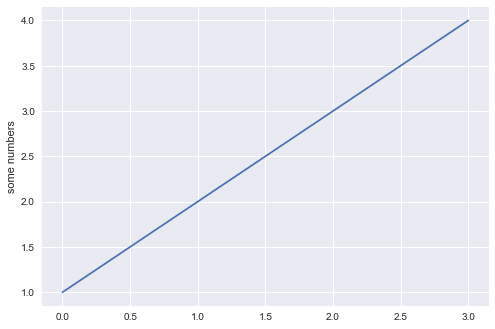

In [61]:
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

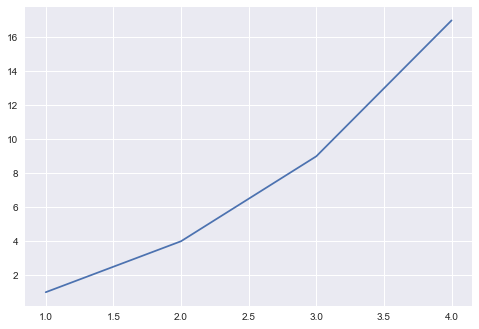

In [64]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 17])

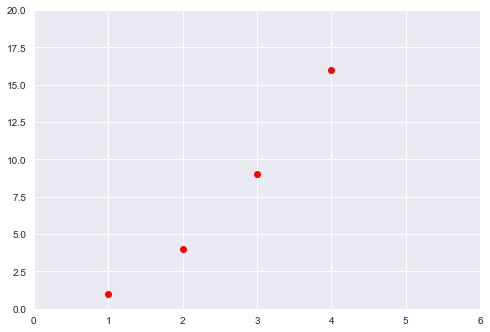

In [66]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

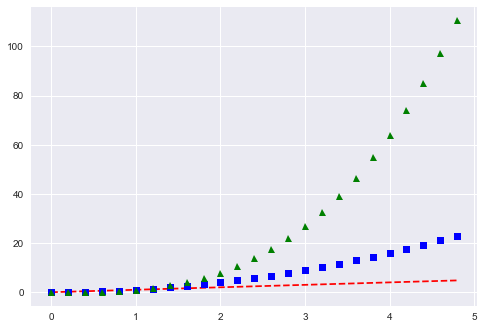

In [67]:
import numpy as np

t = np.arange(0., 5., 0.2)

plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

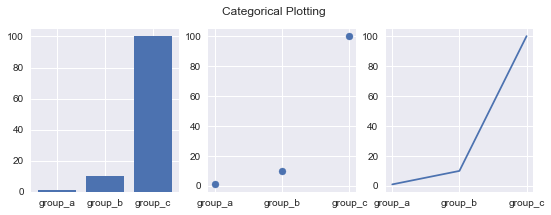

In [68]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()


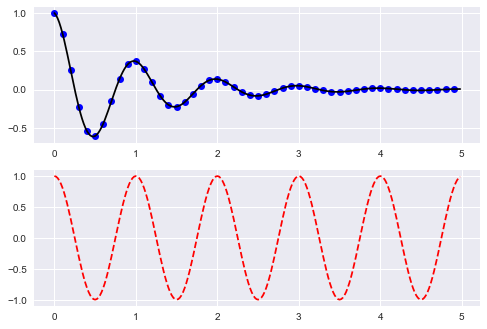

In [69]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

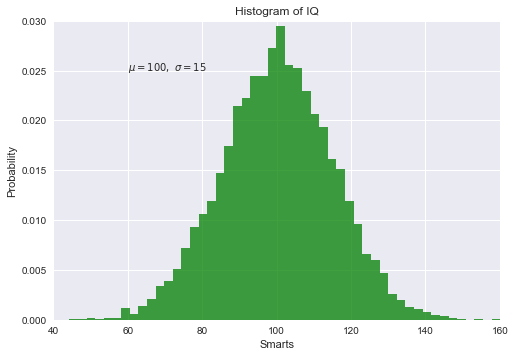

In [71]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

In [72]:
data_rus = data[data.iso_code == 'RUS'].sort_values(by='date').set_index('date')
data_rus.total_cases = data_rus.total_cases.apply(int)

In [73]:
data_rus.columns

Index(['iso_code', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'icu_patients', 'hosp_patients', 'new_tests', 'total_tests',
       'new_tests_smoothed', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'cardiovasc_death_rate',
       'diabetes_prevalence'],
      dtype='object')

In [ ]:
# data.columns

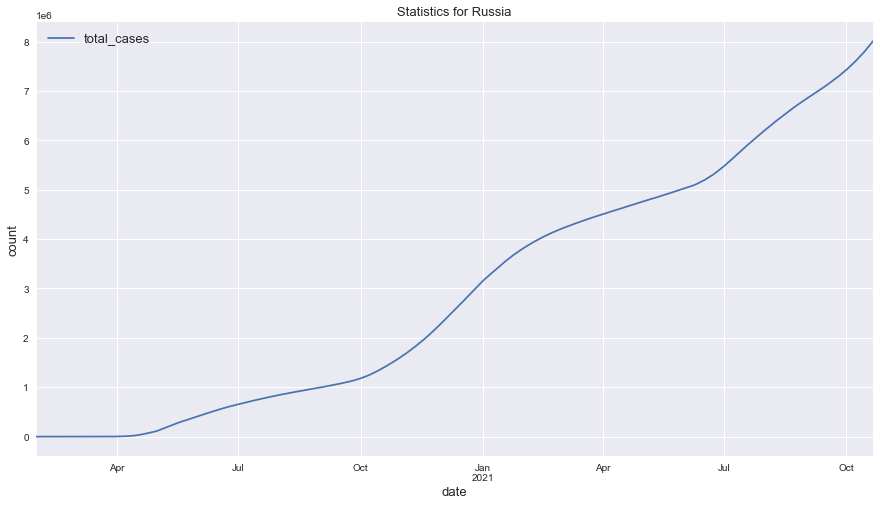

In [74]:
plt.figure(figsize=(15,8))
data_rus.total_cases.plot()
plt.xlabel('date', fontsize=13)
plt.ylabel('count', fontsize=13)
plt.title('Statistics for Russia', fontsize=13)
plt.legend(['total_cases'],fontsize=13)
plt.show()

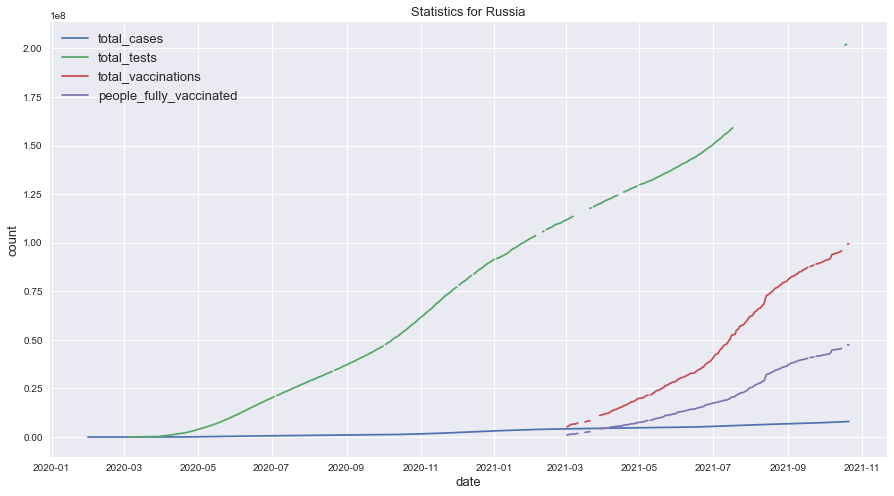

In [75]:
cols_to_show = ['total_cases', 'total_tests', 'total_vaccinations', 'people_fully_vaccinated']
plt.figure(figsize=(15,8))
plt.plot(data_rus.index,data_rus[cols_to_show] )
plt.legend(cols_to_show,fontsize=13)
plt.xlabel('date', fontsize=13)
plt.ylabel('count', fontsize=13)
plt.title('Statistics for Russia', fontsize=13)
plt.show()

In [76]:
data_rus

,iso_code,total_cases,new_cases,new_cases_smoothed,icu_patients,hosp_patients,new_tests,total_tests,new_tests_smoothed,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,cardiovasc_death_rate,diabetes_prevalence
date,,,,,,,,,,,,,,,,
2020-01-31,RUS,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,431.297,6.18
2020-02-01,RUS,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,431.297,6.18
2020-02-02,RUS,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,431.297,6.18
2020-02-03,RUS,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,431.297,6.18
2020-02-04,RUS,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,431.297,6.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-17,RUS,7870529,33428.0,30229.429,NaN,NaN,NaN,NaN,548199.0,NaN,NaN,NaN,NaN,398960.0,431.297,6.18
2021-10-18,RUS,7903963,33434.0,30914.857,NaN,NaN,NaN,201631267.0,555619.0,NaN,NaN,NaN,NaN,473239.0,431.297,6.18
2021-10-19,RUS,7936798,32835.0,31689.286,NaN,NaN,512218.0,202143485.0,553659.0,NaN,NaN,NaN,NaN,556106.0,431.297,6.18


## Задачи

In [89]:
exam_data  = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
        'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
        'attempts': [1, 3, 2, 0, 2, 3, 1, 0, 2, 1],
        'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(exam_data , index=labels)

df

,name,score,attempts,qualify
a,Anastasia,12.5,1,yes
b,Dima,9.0,3,no
c,Katherine,16.5,2,yes
d,James,NaN,0,no
e,Emily,9.0,2,no
f,Michael,20.0,3,yes
g,Matthew,14.5,1,yes
h,Laura,NaN,0,no
i,Kevin,8.0,2,no
j,Jonas,19.0,1,yes


### Задача 1

Переведите столбец qualify в количественный признак

In [90]:
df['qualify_num'] = df.qualify.map({'yes': 1, 'no': 0})

In [91]:
df

,name,score,attempts,qualify,qualify_num
a,Anastasia,12.5,1,yes,1
b,Dima,9.0,3,no,0
c,Katherine,16.5,2,yes,1
d,James,NaN,0,no,0
e,Emily,9.0,2,no,0
f,Michael,20.0,3,yes,1
g,Matthew,14.5,1,yes,1
h,Laura,NaN,0,no,0
i,Kevin,8.0,2,no,0
j,Jonas,19.0,1,yes,1


In [92]:
df['qualify_num_1'] = df.qualify.apply(lambda x: 1 if x=='yes' else 0)

In [93]:
df

,name,score,attempts,qualify,qualify_num,qualify_num_1
a,Anastasia,12.5,1,yes,1,1
b,Dima,9.0,3,no,0,0
c,Katherine,16.5,2,yes,1,1
d,James,NaN,0,no,0,0
e,Emily,9.0,2,no,0,0
f,Michael,20.0,3,yes,1,1
g,Matthew,14.5,1,yes,1,1
h,Laura,NaN,0,no,0,0
i,Kevin,8.0,2,no,0,0
j,Jonas,19.0,1,yes,1,1


### Задача 2

1. Сколько студентов сдали экзамен
2. Какое минимальное количество баллов нужно для сдачи экзамена
3. Какое количество студентов сдали экзамен с более чем 1 попытки
4. Найдите студентов, которые не сдавали экзамен
5. Найдите студентов, которые либо не сдали экзамен, либо не сдавали его

In [94]:
df.qualify_num.sum()

5

In [95]:
df.loc[df.qualify_num==1, 'score'].min()

12.5

In [96]:
df.loc[(df.attempts>1) & (df.qualify_num==1), :].shape[0]

2

In [99]:
df[df.score.isnull()]

,name,score,attempts,qualify,qualify_num,qualify_num_1
d,James,NaN,0,no,0,0
h,Laura,NaN,0,no,0,0


In [101]:
df[(df.qualify_num==0) | (df.attempts==0)]

,name,score,attempts,qualify,qualify_num,qualify_num_1
b,Dima,9.0,3,no,0,0
d,James,NaN,0,no,0,0
e,Emily,9.0,2,no,0,0
h,Laura,NaN,0,no,0,0
i,Kevin,8.0,2,no,0,0


### Задача 3

Найдите среднее, медиану и максимум для столбца score для каждой из групп сдавших и не сдавших экзамен

In [103]:
df[df.qualify_num==1].median()

score            16.5
attempts          1.0
qualify_num       1.0
qualify_num_1     1.0
dtype: float64

In [104]:
df[df.qualify_num==0].median()

score            9.0
attempts         2.0
qualify_num      0.0
qualify_num_1    0.0
dtype: float64

In [106]:
df[df.qualify_num==1].mean()

score            16.5
attempts          1.6
qualify_num       1.0
qualify_num_1     1.0
dtype: float64

In [107]:
df[df.qualify_num==0].mean()

score            8.666667
attempts         1.400000
qualify_num      0.000000
qualify_num_1    0.000000
dtype: float64

In [108]:
df[df.qualify_num==1].max()

name             Michael
score               20.0
attempts               3
qualify              yes
qualify_num            1
qualify_num_1          1
dtype: object

In [109]:
df[df.qualify_num==0].max()

name             Laura
score              9.0
attempts             3
qualify             no
qualify_num          0
qualify_num_1        0
dtype: object

In [111]:
df.groupby('qualify_num')['score'].mean() # meadian, max

qualify_num
0     8.666667
1    16.500000
Name: score, dtype: float64

In [112]:
df.groupby('qualify_num').agg({'score': ['median', 'mean', 'max']})

score                 
            median       mean   max
qualify_num                        
0              9.0   8.666667   9.0
1             16.5  16.500000  20.0

### Задача 4

Добавьте колонку result, используя таблицу ниже

In [115]:
df_res = pd.DataFrame({'passed': ['yes', 'no', 'not defined'], 'result': ['success', 'fail', '50/50']})
df_res

,passed,result
0,yes,success
1,no,fail
2,not defined,50/50


In [121]:
df.merge(df_res, how='inner', left_on='qualify', right_on='passed')

,name,score,attempts,qualify,qualify_num,qualify_num_1,passed,result
0,Anastasia,12.5,1,yes,1,1,yes,success
1,Katherine,16.5,2,yes,1,1,yes,success
2,Michael,20.0,3,yes,1,1,yes,success
3,Matthew,14.5,1,yes,1,1,yes,success
4,Jonas,19.0,1,yes,1,1,yes,success
5,Dima,9.0,3,no,0,0,no,fail
6,James,NaN,0,no,0,0,no,fail
7,Emily,9.0,2,no,0,0,no,fail
8,Laura,NaN,0,no,0,0,no,fail
9,Kevin,8.0,2,no,0,0,no,fail
